# YCSB Analysis of Grid of Parameters
Loop over
* several nodes


In [2]:
code = "1745671672"
#path = "D:\\data\\benchmarks"
path = "/home/perdelt/benchmarks"

In [54]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
import ast
import re

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [55]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

def generate_df(code):
    evaluation = evaluators.ycsb(code=str(code), path=path)
    df_benchmarks = evaluation.get_df_benchmarking()
    #df = df[df.columns.drop(list(df.filter(regex='FAILED')))]
    df_benchmarks = evaluation.benchmarking_set_datatypes(df_benchmarks)
    #df_benchmarks.T
    #print(df_benchmarks)
    with open(path+"/"+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    connections_sorted
    for c in connections_sorted:
        #print(c)
        connection_name = c['name']
        #orig_name = c['orig_name']
        #print(c)
        df_benchmarks['CPU'] = c['hostsystem']['CPU']
        df_benchmarks['Cores'] = c['hostsystem']['Cores']
        df_benchmarks['node'] = c['hostsystem']['node']    
    #df_benchmarks
    return df_benchmarks

def merge_experiments(df_time, code):
    df_time_tmp = generate_df(code)
    df_time = pd.concat([df_time, df_time_tmp])
    return df_time


In [93]:
codes = [
    1745671672, # 10
    1745675272, # 11
    1745678872, # 12
    1745682472, # 13
    1745686072, # 14
    1745689672, # 15
    1745693272, # 17
    1745696872, # 19
    1745704072, # 21
    1745707672, # 22
    1745711272, # 23
    1745714872, # 24
    1745718472, # 25
    1745722072, # 27
    1745725672, # 28
    1745729272, # 29
    1745700472, # 2
    1745736472, # 34
    1745740072, # 36
    1745732872, # 3
    1745743672, # 4
    1745747272, # 5
]

df_time = pd.DataFrame()

for code in codes:
    df_time = merge_experiments(df_time, code)

df_time.T

connection_pod,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,...,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1,PostgreSQL-64-8-196608-1-1,PostgreSQL-64-8-196608-2-1
connection,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,...,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2,PostgreSQL-64-8-196608-1,PostgreSQL-64-8-196608-2
configuration,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,...,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608,PostgreSQL-64-8-196608
experiment_run,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
client,2,1,1,2,1,2,2,1,1,2,...,1,2,1,2,1,2,1,2,1,2
pod,6g8zh.dbmsbenchmarker,v7sck.dbmsbenchmarker,rqzfx.dbmsbenchmarker,s5tsm.dbmsbenchmarker,jc8r8.dbmsbenchmarker,vc8kx.dbmsbenchmarker,dlbrz.dbmsbenchmarker,skk28.dbmsbenchmarker,cpddb.dbmsbenchmarker,gpq4j.dbmsbenchmarker,...,b8g5q.dbmsbenchmarker,5cdvd.dbmsbenchmarker,998zp.dbmsbenchmarker,kqpzw.dbmsbenchmarker,rz6jv.dbmsbenchmarker,6ktd8.dbmsbenchmarker,77qd4.dbmsbenchmarker,l97zm.dbmsbenchmarker,fh6c6.dbmsbenchmarker,b6hgk.dbmsbenchmarker
pod_count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
threads,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
target,180224,180224,180224,180224,180224,180224,180224,180224,180224,180224,...,180224,180224,180224,180224,180224,180224,180224,180224,180224,180224
sf,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
workload,c,c,c,c,c,c,c,c,c,c,...,c,c,c,c,c,c,c,c,c,c


In [133]:
#df_time['time'] = df_time['[OVERALL].RunTime(ms)']/1000.
column = '[READ].99thPercentileLatency(us)'
result = 'Time [ms]'
title = '99th READ Latency'
df_time['time'] = df_time[column]/1000.


In [134]:
df_benchmarks = df_time.set_index(['node', 'client'])

In [135]:
df_benchmarks['time']

node         client
cl-worker10  2         1.254
             1         1.446
cl-worker11  1         1.053
             2         0.847
cl-worker12  1         1.231
             2         0.894
cl-worker13  2         0.950
             1         1.719
cl-worker14  1         3.977
             2         2.127
cl-worker15  2         2.183
             1         2.309
cl-worker17  1         2.669
             2         2.249
cl-worker19  2         1.789
             1         1.799
cl-worker21  1         1.435
             2         1.502
cl-worker22  1         0.353
             2         0.345
cl-worker23  1         0.570
             2         0.463
cl-worker24  1         0.374
             2         0.367
cl-worker25  1         0.364
             2         0.342
cl-worker27  1         0.720
             2         0.709
cl-worker28  2         0.531
             1         0.563
cl-worker29  2         0.547
             1         0.690
cl-worker2   2         1.532
             1         

In [136]:
import matplotlib.pyplot as plt

# Unstack so that num_client is on the x-axis and each node is a separate bar
df_unstacked = df_benchmarks['time'].unstack(level=1)
sorted_index = natural_sort(df_unstacked.index)
df_unstacked = df_unstacked.loc[sorted_index]
df_unstacked

client,1,2
node,,
cl-worker2,3.615,1.532
cl-worker3,1.644,1.164
cl-worker4,7.055,6.395
cl-worker5,6.519,5.547
cl-worker10,1.446,1.254
cl-worker11,1.053,0.847
cl-worker12,1.231,0.894
cl-worker13,1.719,0.950
cl-worker14,3.977,2.127


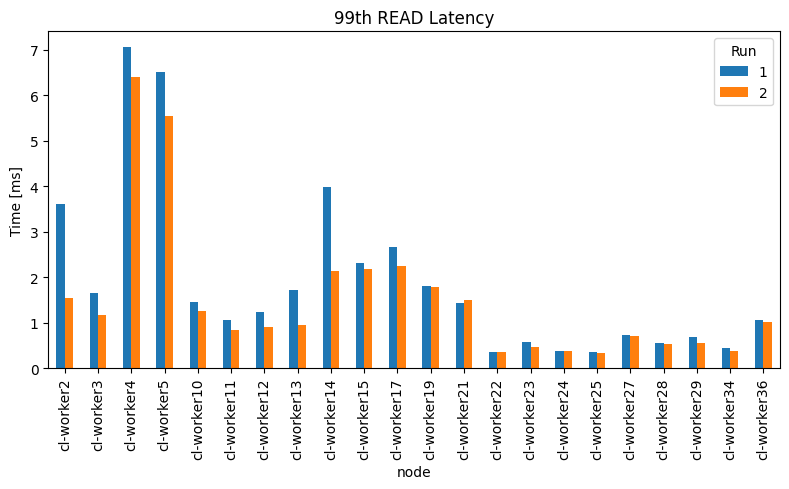

client,1,2
node,,
cl-worker2,3.615,1.532
cl-worker3,1.644,1.164
cl-worker4,7.055,6.395
cl-worker5,6.519,5.547
cl-worker10,1.446,1.254
cl-worker11,1.053,0.847
cl-worker12,1.231,0.894
cl-worker13,1.719,0.950
cl-worker14,3.977,2.127


In [137]:
# Plot the grouped bar chart
df_unstacked.plot(kind='bar', figsize=(8, 5))

plt.ylabel(result)
plt.title(title)
plt.legend(title='Run')
#plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("ycsb_time_per_node.png", dpi=300)
plt.show()
df_unstacked

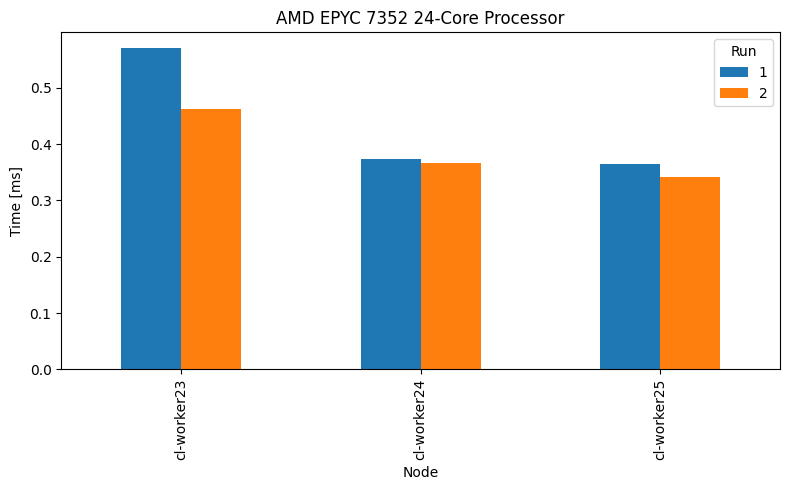

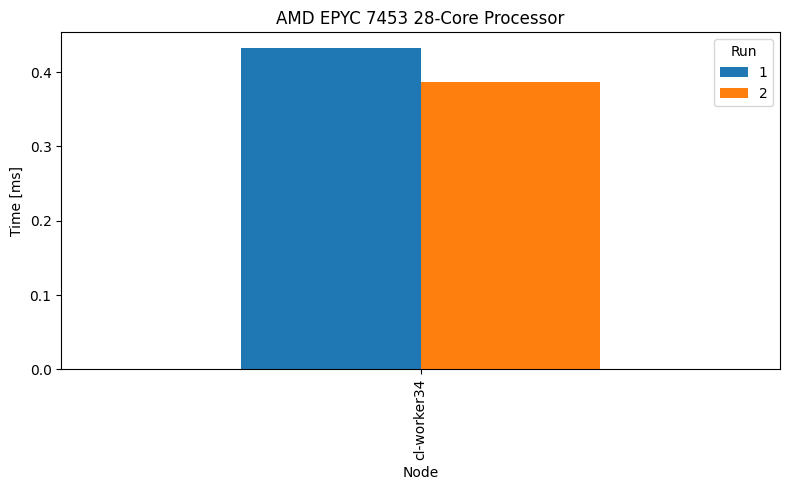

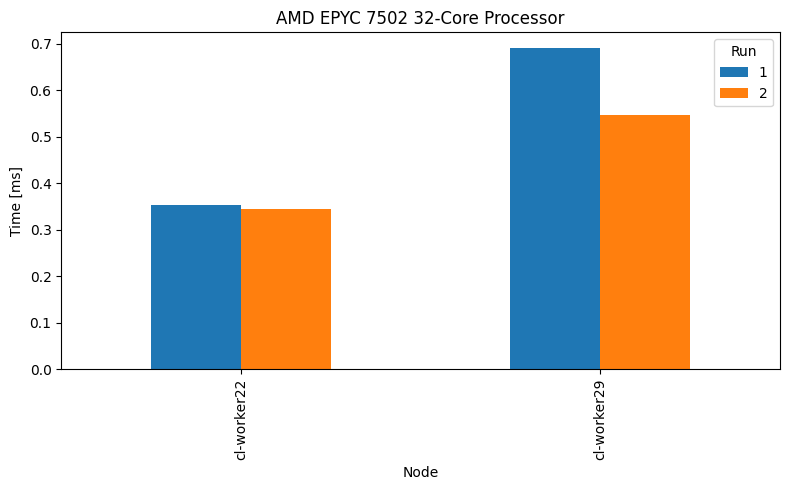

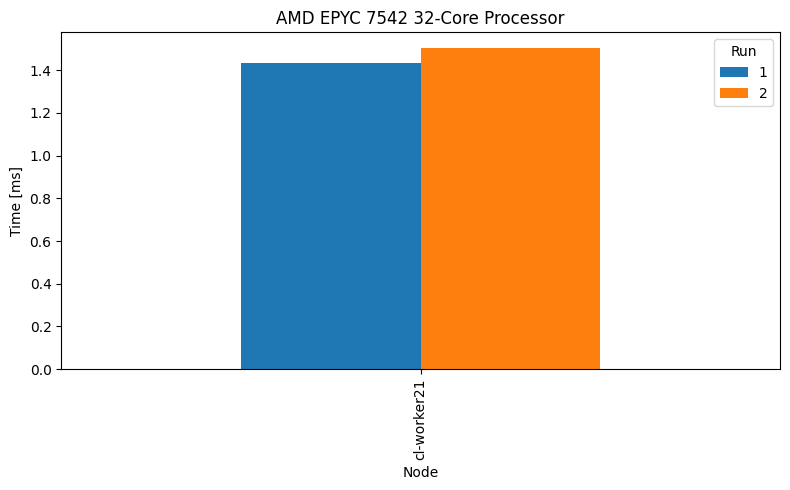

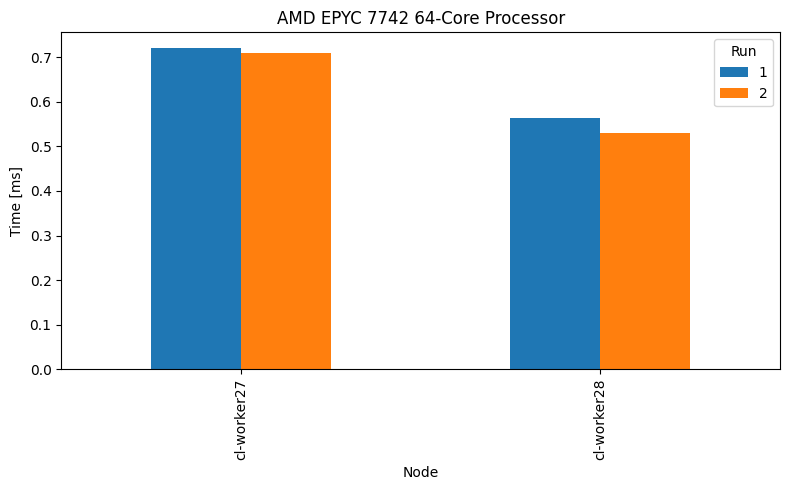

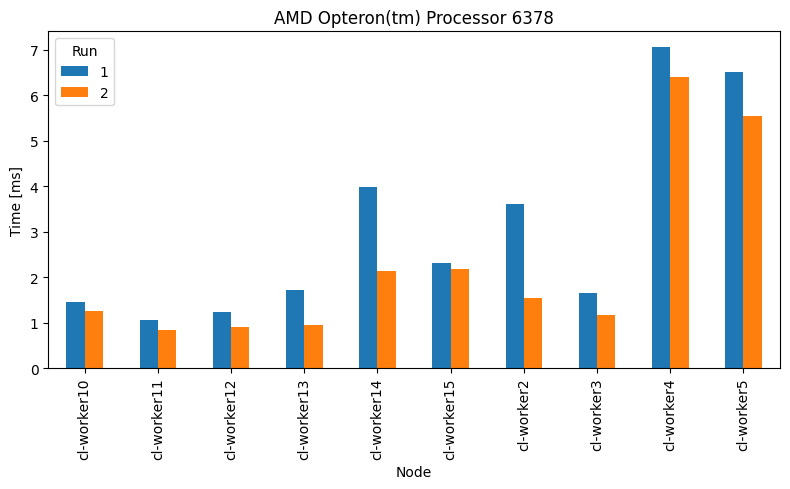

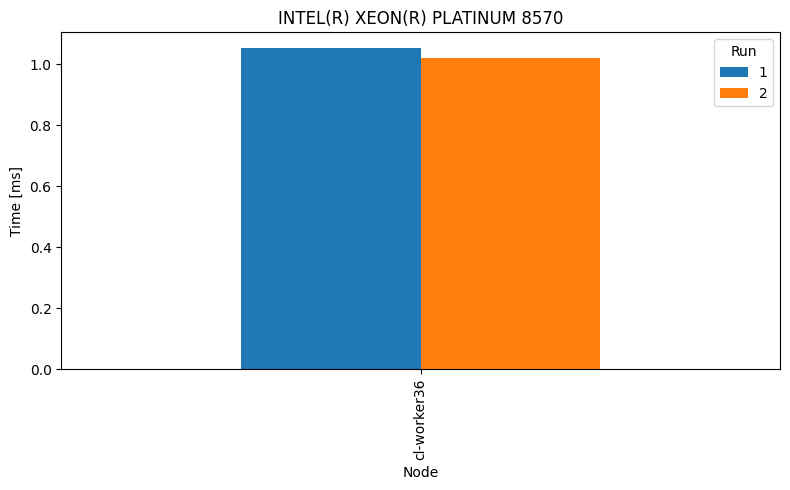

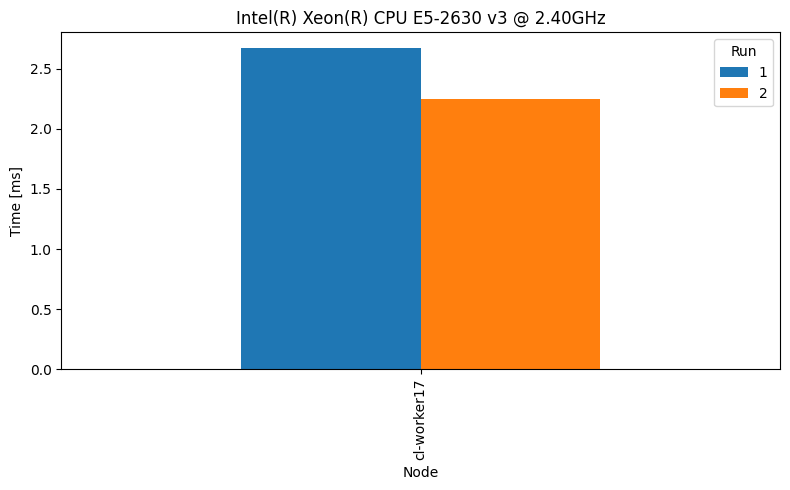

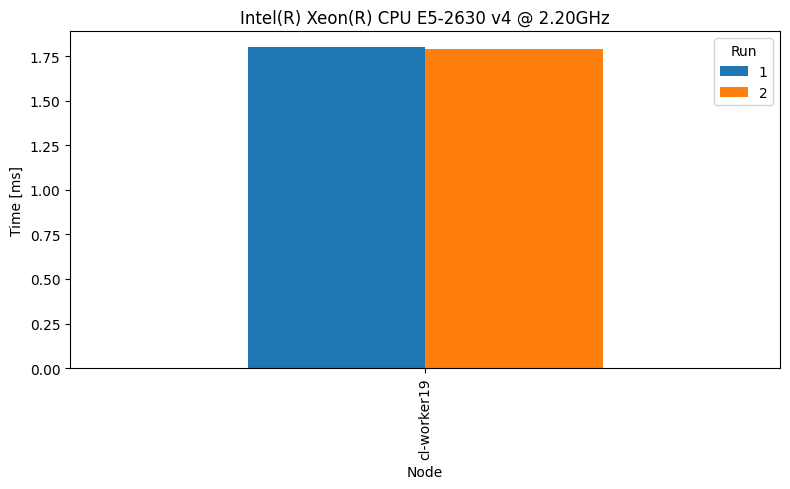

In [138]:
df = df_time.copy()
df = df.set_index(['CPU', 'node', 'client'])
# Group by CPU
for cpu, cpu_df in df.groupby(level='CPU'):
    # Unstack to get nodes as columns, num_client as x-axis
    cpu_df = cpu_df.droplevel('CPU')
    df_unstacked = cpu_df['time'].unstack(level='client')

    # Plot
    ax = df_unstacked.plot(kind='bar', figsize=(8, 5), title=cpu)
    ax.set_ylabel(result)
    ax.set_xlabel("Node")
    ax.legend(title='Run')
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=90)
    plt.tight_layout()
    plt.show()


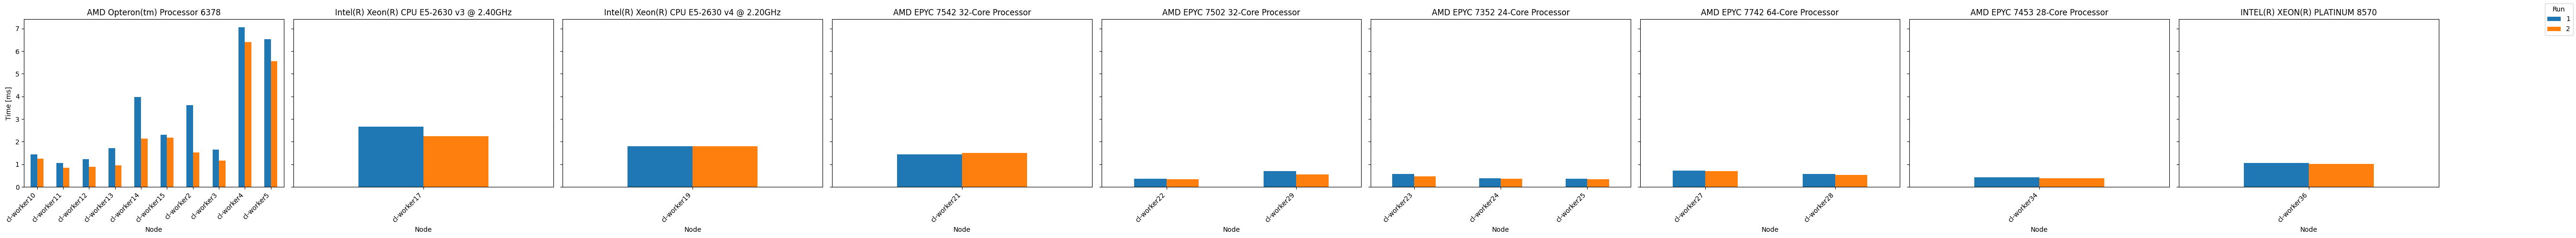

In [139]:
import matplotlib.pyplot as plt

# Get unique CPUs
cpus = df.index.get_level_values('CPU').unique()
n_cpus = len(cpus)

# Create subplots — one row of plots
fig, axes = plt.subplots(nrows=1, ncols=n_cpus, figsize=(6 * n_cpus, 5), sharey=True)

# If only one CPU, axes is not a list — make it iterable
if n_cpus == 1:
    axes = [axes]

# Loop through CPUs and plot into each subplot
for ax, cpu in zip(axes, cpus):
    cpu_df = df.xs(cpu, level='CPU')  # slice data for this CPU
    df_unstacked = cpu_df['time'].unstack(level='client')

    df_unstacked.plot(kind='bar', ax=ax, legend=False)

    ax.set_title(cpu)
    ax.set_xlabel("Node")
    ax.set_ylabel(result)
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=45, ha='right')

# Add one legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Run', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space for legend

# Save to file
plt.savefig("ycsb_time_per_cpu.png", dpi=300)
plt.show()
plt.close()
